# 1. Pré-processamento da base de dados

In [63]:
import pandas as pd

df = pd.read_csv( 'radiomic_data.csv' )
df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},245a9a4dd4a20aabe9c478e95a35aa833ca20590,2D,"(1.0, 1.0)",...,0.000038,8.692009,0.962976,0.040777,0.028123,0.000123,8.843847e+06,5.416673,42.367873,BENIGN
1,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b3a0776528a8f7438a2f6cc95486cafad01adefa,2D,"(1.0, 1.0)",...,0.000021,10.126931,0.963992,0.039417,0.002454,0.000299,4.859019e+07,14.347313,540.091956,BENIGN
2,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f204a9caa1dea0bd0cfa97a68b8b1b98e9c45054,2D,"(1.0, 1.0)",...,0.000023,9.818248,0.882666,0.167003,0.001089,0.000951,3.526641e+06,0.706177,687.525538,BENIGN
3,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8e7a5be028d372a7e1729e2bd28bac01c4a00a8b,2D,"(1.0, 1.0)",...,0.000021,9.865219,0.934424,0.078779,0.001812,0.000794,5.654092e+06,1.171521,381.671430,BENIGN
4,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1e4e7e585f4bfb62c816c1b42c5215a913246ea6,2D,"(1.0, 1.0)",...,0.000013,9.779599,0.926990,0.088650,0.003791,0.000372,5.173518e+06,1.087884,213.296874,BENIGN


In [64]:
df.shape

(2587, 116)

In [65]:
# Nome da coluna alvo
target_column_name = df.columns[ -1 ]

## 1.1 Valores Ausentes

### 1.1.1 Ver se há algum valor ausente no DataFrame

Retorna `True` se houver pelo menos um valor ausente.

In [66]:
df.isnull().values.any()

np.False_

### 1.1.2 Contar quantos valores ausentes há em cada coluna

In [67]:
df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
class                               0
Length: 116, dtype: int64

### 1.1.3 Exibir linhas que possuem valores ausentes

In [68]:
df[ df.isnull().any( axis = 1 ) ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há valores ausentes na base de dados.**

## 1.2 Valores Duplicados

### 1.2.1 Ver se há alguma linha duplicada

Retorna `True` se houver ao menos uma linha duplicada

In [69]:
df.duplicated().any()

np.False_

### 1.2.2 Contar o número de linhas duplicadas

In [70]:
df.duplicated().sum()

np.int64(0)

### 1.2.3 Ver quais são as linhas duplicadas

In [71]:
df[ df.duplicated() ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há linhas duplicadas na base de dados.**

### 1.3 Redução de Dimensionalidade

### 1.3.1 Remover colunas manualmente

Algumas colunas na base de dados são sobre versões de bibliotecas, tamanho das imagens e algumas outras coisas.

In [72]:
columns_to_drop: list[ str ] = [ 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
                                 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
                                 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
                                 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash',
                                 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
                                 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean',
                                 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox',
                                 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum',
                                 'diagnostics_Mask-original_CenterOfMassIndex',
                                 'diagnostics_Mask-original_CenterOfMass' ]

### 1.3.2 Colunas com valores únicos

Algumas colunas da base de dados são preenchidas com um único valor, o que não ajuda muito.

In [73]:
# Conta valores únicos em cada coluna
unique_counts = df.nunique()

# Seleciona nomes de colunas constantes
constant_columns = unique_counts[ unique_counts == 1 ].index.tolist()

# Unificando as listas de colunas que serão removidas
columns_to_drop.extend( constant_columns )

df = df.drop( columns = columns_to_drop )
df.shape

(2587, 93)

### 1.3.3 Análise de Correlação

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Separando as features (X) da variável alvo (y)
X = df.drop( columns = [ target_column_name ] )
y = df[ target_column_name ]

# Pegando as colunas numéricas de X
numeric_cols = X.select_dtypes( include = np.number ).columns.tolist()

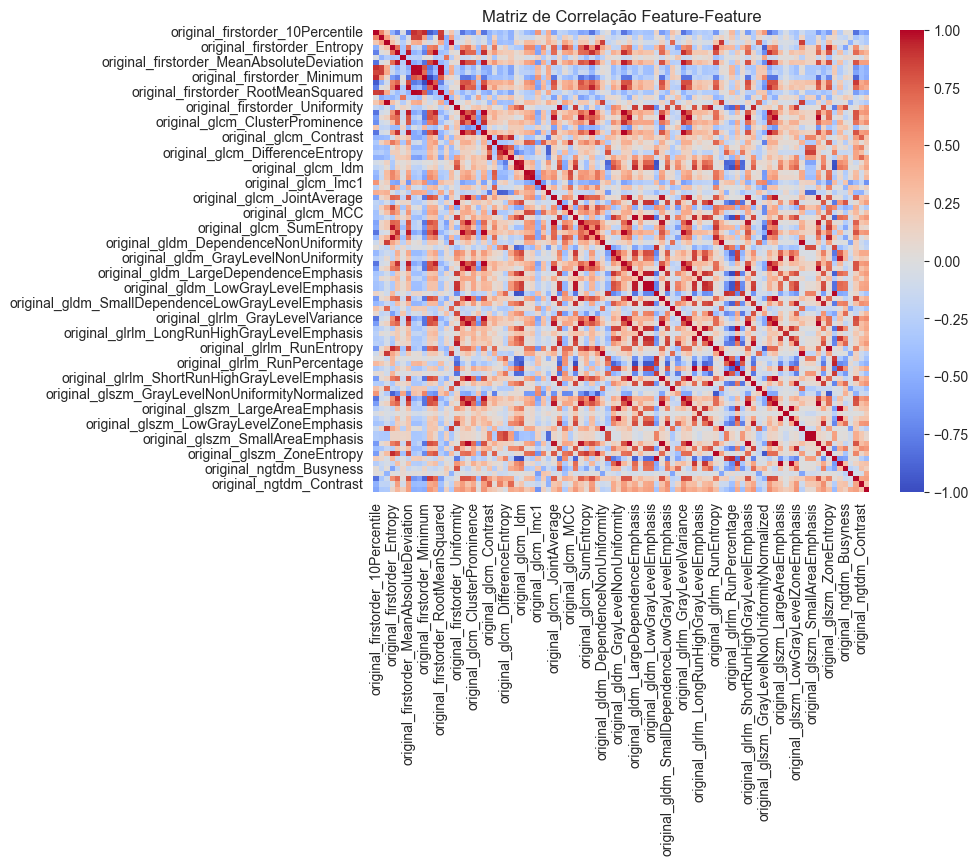

In [75]:
# Calculando matriz de correlação
correlation_matrix = X[ numeric_cols ].corr()

# Plotando o resultado
plt.figure( figsize = (8, 6) )
sns.heatmap( correlation_matrix, cmap = 'coolwarm', annot = False )
plt.title( 'Matriz de Correlação Feature-Feature' )
plt.show()

# **TESTAR OUTRAS ESTRATÉGIAS**

In [76]:
# Limiar de correlação absoluta
correlation_threshold = 0.9

# Encontrar pares de features com correlação acima do limiar
# Usamos o triângulo superior da matriz para evitar pares duplicados (A,B) e (B,A)
# e correlação de uma feature com ela mesma (diagonal = 1)
upper_triangle = correlation_matrix.where( np.triu( np.ones( correlation_matrix.shape ), k = 1 ).astype( bool ) )

# Encontrar colunas a serem removidas
columns_to_drop = set()
for i in range( len( upper_triangle.columns ) ):
    for j in range( i ):
        if abs( upper_triangle.iloc[ j, i ] ) > correlation_threshold:
            colname_i = upper_triangle.columns[ i ]
            colname_j = upper_triangle.columns[ j ]

            # Estratégia: Remover a coluna 'i' (a segunda do par no loop)
            # Outras estratégias poderiam ser implementadas aqui (ex: remover a com menor variância,
            # ou a com menor correlação média com as demais, ou menor corr com o alvo se calculado)
            columns_to_drop.add( colname_i )

X_reduced_ff = X.drop( columns = list( columns_to_drop ) )

X_reduced_ff.shape

(2587, 32)

In [77]:
df_corr_ff = pd.concat( [ X_reduced_ff, y ], axis = 1 )
df_corr_ff.shape

(2587, 33)

### 1.3.4 Seleção Baseada em Informação Mútua (Mutual Information)

É um método de filtro que avalia a relação entre cada feature e a variável alvo de classificação, capturando dependências não lineares (indo além da correlação simples).

A ideia é:

In [78]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

#  Codificar alvo (y) para formato numérico
le = LabelEncoder()
y_encoded = le.fit_transform( y )

# Criar uma cópia de X para codificar, preservando o X original por enquanto
X_encoded = X.copy()

In [90]:
# Calculando Scores de Mutual Information
mi_scores = mutual_info_classif( X_encoded, y_encoded, discrete_features = 'auto', random_state = 42 )

# Criar uma Series para facilitar a visualização
mi_scores_series = pd.Series( mi_scores, index = X_encoded.columns ).sort_values( ascending = False )

# print("\nScores de Mutual Information calculados (maior para menor):")
# print(mi_scores_series)
#
# # Plotar os scores para visualização
# plt.figure(figsize=(10, max(6, len(X_encoded.columns) // 2))) # Ajusta altura
# mi_scores_series.plot(kind='barh', color='teal')
# plt.title('Scores de Mutual Information por Feature')
# plt.xlabel('Score MI')
# plt.ylabel('Feature')
# plt.gca().invert_yaxis() # Maior score no topo
# plt.tight_layout() # Ajusta o layout para não cortar labels
# plt.show()

In [80]:
# Selecionar as K Melhores Features
k_features_to_keep = 30

# Instanciar o seletor
# Passamos a função de score e o número K
selector = SelectKBest( score_func = mutual_info_classif, k = k_features_to_keep )

# Ajustar o seletor aos dados codificados (X_encoded, y_encoded)
selector.fit( X_encoded, y_encoded )

# Obter as features selecionadas (nomes das colunas)
selected_features_mask = selector.get_support()
selected_features_names = X_encoded.columns[ selected_features_mask ]

In [81]:
# Selecionar as colunas correspondentes do DataFrame ORIGINAL (X) para preservar os tipos de dados originais
X_selected_mi = X[ selected_features_names ].copy()

# Combinar as features selecionadas (X_selected_mi) com a coluna alvo ORIGINAL (y)
df_mi = pd.concat( [ X_selected_mi, y ], axis = 1 )
df_mi.shape

(2587, 31)

### 1.3.5 Seleção Baseada em Modelos de Árvore

Modelos como Random Forest ou Gradient Boosting são poderosos para classificação, lidam bem com dados mistos (após encoding), capturam interações e não linearidades, e fornecem uma métrica direta de feature_importances_.

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X_encoded = X.copy()

# n_estimators: número de árvores na floresta
# random_state: para reprodutibilidade
# n_jobs=-1: usar todos os processadores disponíveis (acelera)
# oob_score=True pode dar uma estimativa de desempenho
rf_model = RandomForestClassifier( n_estimators = 100, random_state = 42, n_jobs = -1, oob_score = True )

rf_model.fit( X_encoded, y_encoded )
print( f"Modelo treinado. OOB Score (estimativa de acurácia): {rf_model.oob_score_:.4f}" )

Modelo treinado. OOB Score (estimativa de acurácia): 0.5883


In [91]:
# Extrair as features importantes
importances = rf_model.feature_importances_
feature_importances = pd.Series( importances, index = X_encoded.columns ).sort_values( ascending = False )

# print( "\nImportância das Features segundo o Random Forest:" )
# print( feature_importances )

# Plotar as importâncias
# plt.figure( figsize = (10, max( 6, len( X_encoded.columns ) // 2 )) )
# feature_importances.plot( kind = 'barh', color = 'forestgreen' )
# plt.title( 'Importância das Features (Random Forest)' )
# plt.xlabel( 'Importância Média de Redução de Impureza' )
# plt.ylabel( 'Feature' )
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()


In [97]:

# --- 5. Selecionar Features com SelectFromModel ---
# SelectFromModel seleciona features cuja importância é maior que um limiar.
# O limiar pode ser um valor numérico ou uma string como "mean" ou "median".
# Usar "median" pode ser mais robusto a outliers nos scores de importância.
# threshold="median" # <<<--- Você pode ajustar isso (ex: "mean", 0.01, etc.)
threshold_value = "median"  # Ou 'mean', ou um float como 0.005

# Passamos o modelo JÁ TREINADO (rf_model) e prefit=True
# O threshold define o corte
selector_rf = SelectFromModel( rf_model, threshold = threshold_value, prefit = True )

# Aplicar o seletor aos dados codificados (ele não re-treina)
# Apenas verifica quais colunas passam no threshold
mask_selected_rf = selector_rf.get_support()
selected_features_rf_names = X_encoded.columns[ mask_selected_rf ]

In [96]:
# Selecionar as colunas do DataFrame ORIGINAL X para manter os tipos
X_selected_rf = X[ selected_features_rf_names ].copy()

# Combinar com a coluna alvo ORIGINAL y
df_rf = pd.concat( [ X_selected_rf, y ], axis = 1 )

df_rf.shape

(2587, 47)

### 1.3.6 Eliminação Recursiva de Atributos

### 1.3.7 Análise de Componentes Principais (PCA)

### 1.3.8 Análise Discriminante Linear (LDA)

# **DÚVIDA: É NECESSÁRIO SEPARAR A BASE (TESTE/TREINO) ANTES DE REMOVER OUTLIERS?**

# **TESTE: REMOVENDO OUTLIERS. QUAL SERÁ O IMPACTO? COMPARAR DEPOIS!**

## 1.4 Outliers

Outliers (ou valores atípicos) são dados que se distanciam significativamente da maioria dos outros valores em um conjunto.

#### Quartis

Os quartis dividem os dados ordenados em quatro partes iguais:

- Q1 (1º quartil): 25% dos dados estão abaixo dele.
- Q2 (2º quartil ou mediana): 50% dos dados estão abaixo dele.
- Q3 (3º quartil): 75% dos dados estão abaixo dele.

#### IQR (Intervalo Interquartílico)

É a diferença entre Q3 e Q1, e representa o “miolo” dos dados: IQR = Q3 − Q1.

#### Limites para detectar outliers (método IQR)

Valores são considerados outliers se estiverem muito fora desse intervalo central:

- Limite inferior: Q1 − 1.5 × IQR
- Limite superior: Q3 + 1.5 × IQR

Qualquer valor fora desse intervalo é considerado potencial outlier.


In [82]:
import matplotlib.pyplot as plt

# Copia do DataFrame original para preservar os dados
df_sem_outliers = df.copy()

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes( include = [ 'number' ] ).columns

# Calcular limites IQR e contar outliers por coluna
for col in numeric_cols:
    Q1 = df[ col ].quantile( 0.25 )
    Q3 = df[ col ].quantile( 0.75 )
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[ (df[ col ] < lower_bound) | (df[ col ] > upper_bound) ][ col ]
    count = outliers.count()
    percent = count / len( df ) * 100

    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[ col ] >= lower_bound) & (df_sem_outliers[ col ] <= upper_bound) ]

df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 3 to 2586
Data columns (total 93 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_firstorder_10Percentile                    1202 non-null   float64
 1   original_firstorder_90Percentile                    1202 non-null   float64
 2   original_firstorder_Energy                          1202 non-null   float64
 3   original_firstorder_Entropy                         1202 non-null   float64
 4   original_firstorder_InterquartileRange              1202 non-null   float64
 5   original_firstorder_Kurtosis                        1202 non-null   float64
 6   original_firstorder_MeanAbsoluteDeviation           1202 non-null   float64
 7   original_firstorder_Mean                            1202 non-null   float64
 8   original_firstorder_Median                          1202 non-null   float64
 9   or

Análise: antes de remover os possíveis outliers, nossa base tinha 2587 linhas, após a remoção, ficou com 1202.